In [315]:
import pandas as pd
import numpy as np
import re
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [316]:
copper1=pd.read_csv('./naver.csv')
copper2=pd.read_csv('./naver_challenge.csv')
dat1=copper1[['description', 'rating' ]]
dat1['format']=copper1.genre.str.split(', ').str[0]
dat1['genre']=copper1.genre.str.split(', ').str[1]
dat2=copper2[['genre', 'format', 'description', 'rating']]

C:\Users\shyun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\shyun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [317]:
dat1.loc[dat1['format']=="에피소드",'format'] = 'episode'
dat1.loc[dat1['format']=="스토리",'format'] = 'story'
dat1.loc[dat1['format']=="옴니버스",'format'] = 'omnibus'

dat2.loc[dat2['format']=="에피소드",'format'] = 'episode'
dat2.loc[dat2['format']=="스토리",'format'] = 'story'
dat2.loc[dat2['format']=="옴니버스",'format'] = 'omnibus'

C:\Users\shyun\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [318]:
dat1.loc[dat1['genre']=="로맨스",'genre'] ='pure'
dat1.loc[dat1['genre']=="감성",'genre'] ='sensibility'
dat1.loc[dat1['genre']=="개그",'genre'] ='comic'
dat1.loc[dat1['genre']=="드라마",'genre'] ='drama'
dat1.loc[dat1['genre']=="무협/사극"'genre'] ='historical'
dat1.loc[dat1['genre']=="무협/사극"'genre'] ='historical'
dat1.loc[dat1['genre']=="스릴러",'genre'] ='thrill'
dat1.loc[dat1['genre']=="스포츠",'genre'] ='sports'
dat1.loc[dat1['genre']=="액션",'genre'] ='action'
dat1.loc[dat1['genre']=="일상",'genre'] ='daily'
dat1.loc[dat1['genre']=="판타지",'genre'] ='fantasy'


C:\Users\shyun\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\shyun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\shyun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [319]:
eww=[]
for x in dat1['genre']:
    if x not in eww:
        eww.append(x)
eww

['pure',
 'fantasy',
 'drama',
 'sports',
 'comic',
 'thrill',
 'action',
 'daily',
 'sensibility',
 '무협/사극']

In [320]:
dat1.loc[dat1['genre'] == '무협/사극', 'genre'] ='historical'

C:\Users\shyun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [321]:
eww=[]
for x in dat1['genre']:
    if x not in eww:
        eww.append(x)
eww

['pure',
 'fantasy',
 'drama',
 'sports',
 'comic',
 'thrill',
 'action',
 'daily',
 'sensibility',
 'historical']

In [322]:
for x in dat1['genre']:
    if x!='pure' and x!='sensibility' and x!= 'comic' and x!= 'drama' and x != 'historical' and x != 'thrill' and x != 'sports' and x !='action' and x !='daily' and x !='fantasy':    
        print(wa)

In [323]:
dat1['description']=dat1['description'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
dat1=dat1.dropna(how="any")
dat2['description']=dat2['description'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
dat2=dat2.dropna(how="any")

C:\Users\shyun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\shyun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [324]:
dat=pd.concat([dat1,dat2], ignore_index=True)

In [325]:
dat.dropna()

,description,rating,format,genre
0,흔하디 흔한 재벌후계자와 캔디도 울고 갈 박복한 가난소녀의 파란만장 동거기인기작 다...,9.11,story,pure
1,이번 주인공은 돌이다돌이지만 동료도 모으고 악당도 물리친다랑또 작가표 동양 판타지 ...,9.98,story,fantasy
2,어느 날 인어가 내게 말을 걸어왔다 눈을 떠보니 총구가 있었다 그리고 몸이 연기처럼...,9.95,omnibus,drama
3,한국 최초 한국형 고교스포츠 웹툰열혈따윈 개나 줘 낙오자들 뿐인 농구부의 운명은,9.96,story,sports
4,사람은 좀 죽여도 싸우는건 싫어해요 게임에서조차 집 바깥을 나가지 않는 제리 전투는...,9.94,story,fantasy
...,...,...,...,...
7436,한국 전통의 전설의 무술 화랑무 그 진원지인 진산군 도복리 그 신비의 고장에 종합격...,9.58,story,sports
7437,신의 보구중 하나인 신의펜촉을 받은 변봉주인공이 만화를 그려나가는 이야기입니다 월일...,9.66,story,sports
7438,모든 것을 가진 소년과 아무것도 갖지 못한 소년의 에어레이스를 통한 성장 드라마,9.5,story,sports
7439,프로레슬링 디바를 꿈꾸는 날다람쥐소녀,9.77,story,sports


In [326]:
dat[7400:]

,description,rating,format,genre
7400,다트를 좋아하는 주인공 신도림의 이야기,9.51,episode,sports
7401,상처 많은 사람들이 수영으로 성장하는 이야기,9.44,story,sports
7402,아싸 김치우 씨름으로 인생 인싸로 뒤집기,9.09,story,sports
7403,모든게 순탄할 거라 믿었던 대 프로레슬러 혜성 그런 그의 인생이 모두 뒤흔들린다 그...,9.54,story,sports
7404,지름 비비탄이 만들어내는 소년 소녀들의 이야기,9.62,story,sports
7405,이제 막 대학에 입학한 이진수의 평범한 농구 동아리 이야기,9.73,story,sports
7406,꿈을 쫓는 소년들의 축구드라마,8.75,story,sports
7407,신체적 콤플렉스로 인해 괴물이라고 불리며 주위로부터 소외당하던 은미는 미식축구의 세...,8.96,episode,sports
7408,유성고등학교 야구부의 성장 스토리매주 금요일 밤 연재,8.63,story,sports
7409,주짓수를 통해 자신을 성장 시켜나가는 사람들의 이야기,9.04,story,sports


In [327]:
cdf=pd.DataFrame(dat)

In [328]:
cdf.to_csv('coppers.csv', index=False)

In [329]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '을', '되다', '이야기']

In [330]:
okt=Okt()
X_train=[]
for sentence in tqdm(dat['description']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)


100%|██████████| 7441/7441 [00:22<00:00, 335.55it/s]


In [331]:
print(X_train[:3])

[['흔', '하디', '흔하다', '재벌', '후계', '캔디', '울', '고', '갈다', '박복하다', '가난', '소녀', '파란만장', '동거', '기', '인기', '작', '다세포', '소녀', '웹툰', '판'], ['이번', '주인공', '돌이', '다', '돌이', '지만', '동료', '모으다', '악당', '물리', '치다', '또', '작', '가표', '동양', '판타지', '소년만화'], ['어느', '날', '인어', '내다', '말', '걸어오다', '눈', '떠보다', '총구', '있다', '그리고', '몸', '연기', '처럼', '사라지다', '시작', '판타지', '보다', '비현실적', '인', '우리', '회색', '빛']]


In [332]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [333]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 12993
등장 빈도가 1번 이하인 희귀 단어의 수: 3561
단어 집합에서 희귀 단어의 비율: 27.407065342876933
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.472023991336462


In [334]:
vocab_size=total_cnt-rare_cnt +1

In [335]:
vocab_size

9433

In [336]:
tokenizer=Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)

In [337]:
print(X_train[:1])

[[4117, 5036, 838, 638, 1453, 6179, 954, 18, 927, 2272, 31, 1826, 426, 79, 367, 316, 31, 102, 1244]]


In [338]:
print(tokenizer.word_index)

{'그': 1, '있다': 2, '에서': 3, '로': 4, '수': 5, '사람': 6, '연재': 7, '인': 8, '이다': 9, '에게': 10, '것': 11, '없다': 12, '일상': 13, '시작': 14, '날': 15, '위해': 16, '않다': 17, '고': 18, '그리고': 19, '어느': 20, '인간': 21, '보다': 22, '사랑': 23, '세상': 24, '일': 25, '년': 26, '그녀': 27, '자신': 28, '남자': 29, '적': 30, '소녀': 31, '만화': 32, '되어다': 33, '만나다': 34, '평범하다': 35, '세계': 36, '속': 37, '주인공': 38, '매주': 39, '버리다': 40, '자유': 41, '게': 42, '같다': 43, '나': 44, '로맨스': 45, '친구': 46, '다': 47, '소년': 48, '받다': 49, '함께': 50, '못': 51, '하고': 52, '살': 53, '판타지': 54, '작가': 55, '살다': 56, '내': 57, '싶다': 58, '곳': 59, '모든': 60, '만': 61, '꿈': 62, '과연': 63, '나타나다': 64, '그렇다': 65, '두': 66, '학교': 67, '우리': 68, '찾다': 69, '살아가다': 70, '알': 71, '위': 72, '중': 73, '아니다': 74, '사건': 75, '아이': 76, '다른': 77, '삶': 78, '기': 79, '생활': 80, '하나': 81, '오다': 82, '전': 83, '다시': 84, '말': 85, '연애': 86, '인생': 87, '집': 88, '까지': 89, '신': 90, '부터': 91, '앞': 92, '들다': 93, '눈': 94, '만들다': 95, '가지다': 96, '여자': 97, '게임': 98, '벌어지다': 99, '세': 100, '하지만': 101, '웹툰': 102

In [339]:
y1=np.array(dat['genre'])

In [340]:
y2=np.array(dat['format'])

In [341]:
print(max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))

174
리뷰의 평균 길이 : 18.880661201451417


리뷰의 최대 길이 : 174
리뷰의 평균 길이 : 18.880661201451417


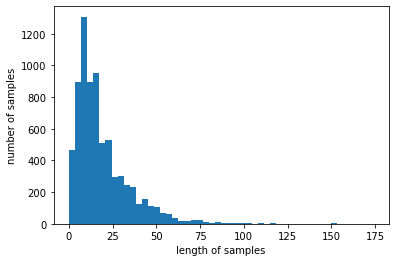

In [342]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [343]:
X_train=pad_sequences(X_train, maxlen=55)

In [344]:
y1t=y1.T

In [345]:
y1t

array(['pure', 'fantasy', 'drama', ..., 'sports', 'sports', 'sports'],
      dtype=object)

In [346]:
format(y1t)

"['pure' 'fantasy' 'drama' ... 'sports' 'sports' 'sports']"

In [347]:
wa=np.array([y1,y2])

In [348]:
wa.shape

(2, 7441)

In [349]:
X_train.shape

(7441, 55)

In [350]:
wa.T.shape

(7441, 2)

In [351]:
waa=np.hstack([X_train, wa.T])

In [352]:
waa

array([[0, 0, 0, ..., 1244, 'pure', 'story'],
       [0, 0, 0, ..., 2520, 'fantasy', 'story'],
       [0, 0, 0, ..., 653, 'drama', 'omnibus'],
       ...,
       [0, 0, 0, ..., 126, 'sports', 'story'],
       [0, 0, 0, ..., 31, 'sports', 'story'],
       [0, 0, 0, ..., 171, 'sports', 'story']], dtype=object)

In [353]:
df=pd.DataFrame(waa)

In [355]:
df.to_csv('reformedData.csv', index=False)